**Problem 3: ResNet model using CIFAR10 dataset.**

*Trained Model drive link* https://drive.google.com/file/d/1kcwf42bKkWTJFBq5CSb9Ihb_xshnIKf8/view?usp=drive_link

In [1]:
#importing the necessary librarie

from tensorflow.keras.datasets import cifar10
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import color
import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Concatenate, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


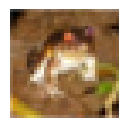

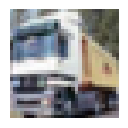

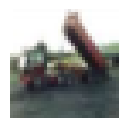

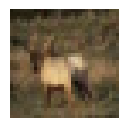

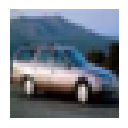

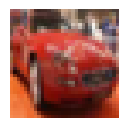

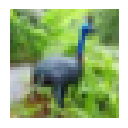

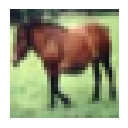

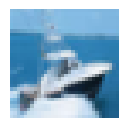

In [3]:
## display a 1st 10 images

def show_image(image, cmap_type= 'gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.axis('off')
    plt.show()

sample11= x_train_cifar[:9]
for a,i in enumerate(sample11):
    plt.subplot(3,3,a+1)
    show_image((i))

In [4]:
## performing normalization and One hot encoding

x_train_cifar = x_train_cifar / 255.0
x_test_cifar = x_test_cifar / 255.0

onehotencode_y_train_cifar = to_categorical(y_train_cifar, num_classes=10)
onehotencode_y_test_cifar = to_categorical(y_test_cifar, num_classes=10)

### Model Architecture

The given ResNet model consists of the following layers:

1. **Conv2D layer:** Consists of2D convolutional layer with 32 filters,kernel size = 3 and padding = "same".

2. **Input layer:** The input layes takes a 3D tensor of shape (32, 32, 3) representing CIFAR-10 images.


3. **Activation layer and Batch Normalization  layer:** Introduces the **relu** activation function to the previous layer and the **Batch Normalization** activation is used for the previous convolutional layer.
4. **Residual Blocks:**
- Section A: Three sequential blocks each with two convolutional layers with 32 filters.
- Section B: Three sequential blocks with 64 filters.
- Section C: Three sequential blocks with 128 filters.

5. Each block consists of two Conv2D layers with Batch Normalization and ReLU activation. The input to the block is added to the output of the second Batch Normalization before passing through a ReLU activation.

6. **Global Average Pooling 2D:** Computes the spatial average of the previous layer's output across all channels.

7. **Dense layer:** A fully connected layer with 10 neurons which represent the output classes for classification.

8. **Softmax activation layer:** Applies the softmax function to the output of the previous layer.





In [5]:
# RSU block for diff num of filters

def residualBlock(x, filters):
    shortcut = x
    x = Conv2D(filters, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)

    if shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=1, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Concatenate()([shortcut, x])
    x = Activation('relu')(x)
    return x

In [6]:
 #the Restnet model

def res_net_model():
    input = Input(shape=(32, 32, 3))

    x = Conv2D(32, kernel_size=3, padding='same')(input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

      #block A
    x = residualBlock(x, 32)
    x = residualBlock(x, 32)
    x = residualBlock(x, 32)
  #block B
    x = residualBlock(x, 64)
    x = residualBlock(x, 64)
    x = residualBlock(x, 64)

    #block C
    x = residualBlock(x, 128)
    x = residualBlock(x, 128)
    x = residualBlock(x, 128)

    x = GlobalAveragePooling2D()(x)
    output = Dense(10, activation='softmax')(x)
    model = Model(inputs=input, outputs=output)
    return model

In [7]:
modelt = res_net_model()
modelt.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
history = modelt.fit(x_train_cifar, onehotencode_y_train_cifar, batch_size=32, epochs=100, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 51s 19ms/step - accuracy: 0.3782 - loss: 1.6613 - val_accuracy: 0.5066 - val_loss: 1.3746
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.6092 - loss: 1.0833 - val_accuracy: 0.6043 - val_loss: 1.1503
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.6843 - loss: 0.8859 - val_accuracy: 0.5497 - val_loss: 1.3177
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7353 - loss: 0.7462 - val_accuracy: 0.7148 - val_loss: 0.8148
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7727 - loss: 0.6457 - val_accuracy: 0.7139 - val_loss: 0.8356
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8036 - loss: 0.5642 - val_accuracy: 0.7645 - val_loss: 0.6894
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8312 - loss: 0.4913 - val_accuracy: 0.7635 - val_loss: 0.6874
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 

In [8]:
modelt.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 32, 32, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 32, 32, 32)     │            896 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 32, 32, 32)     │            128 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 32, 32, 32)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 32, 32, 32)     │          9,248 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 32, 32, 32)     │            128 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 32, 32, 32)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 32, 32, 32)     │          9,248 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 32, 32, 32)     │            128 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 32, 32, 64)     │              0 │ activation[0][0],      │
│                           │                        │                │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 32, 32, 64)     │              0 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 32, 32, 32)     │         18,464 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 32, 32, 32)     │            128 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 32, 32, 32)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 32, 32, 32)     │          2,080 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 32)     │          9,248 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 32, 32, 32)     │            128 │ conv2d_5[0][0]         │
│ (BatchNormalization) 

 Total params: 4,933,280 (18.82 MB)

 Trainable params: 1,643,210 (6.27 MB)

 Non-trainable params: 3,648 (14.25 KB)

 Optimizer params: 3,286,422 (12.54 MB)

- The given RESNET model consists of convolutional neural network model with skip connections, which takes an input of dimension (32, 32, 3) -
- It has a total of 1,646,858 parameters: where 1,643,210 are trainable and 3,648 are non-trainable parameters.
- This model comprises of multiple convolutional layers, each followed by batch normalization and activation functions and skip connections are added between them.
- It concludes with a global average pooling layer which is then followed by a dense layer with 10 units, where the 10 units depict the 10 classes in the dataset.
- Therefore we can say that this model aims to learn hierarchical representations of the input images through the convolutional layers using skip connections to preserve important features from the earlier layers.
- Then the global average pooling layer combines the learned representations into a fixed-length vector which is then fed to the output dense layer for classification.

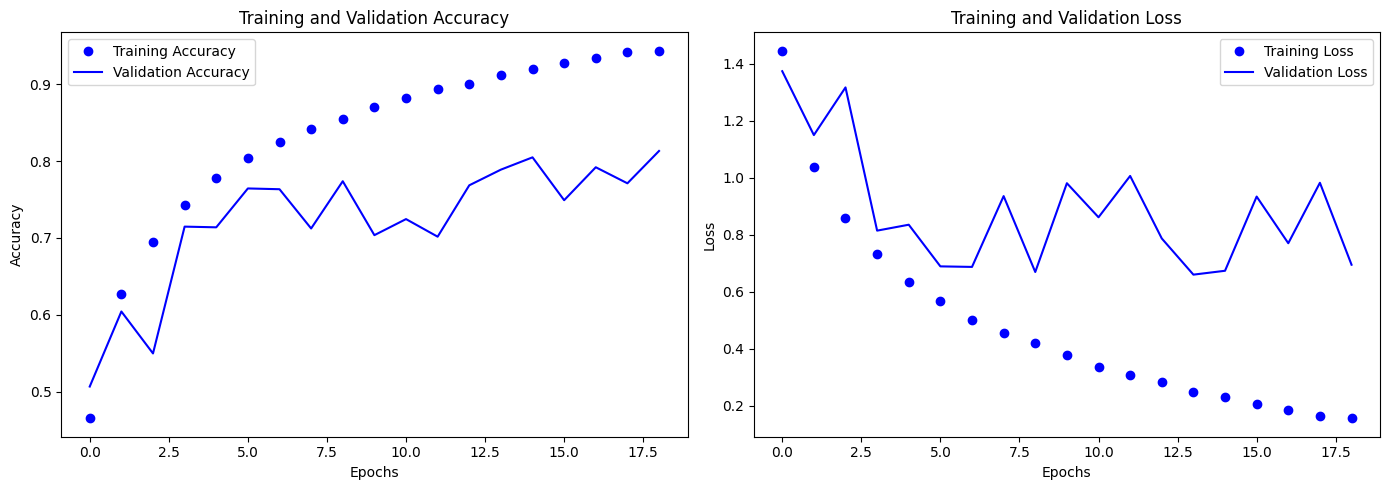

In [9]:
# visualization using plots

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
ax1.plot(epochs, accuracy, 'bo', label='Training Accuracy')
ax1.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Loss
ax2.plot(epochs, loss, 'bo', label='Training Loss')
ax2.plot(epochs, val_loss, 'b', label='Validation Loss')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()
plt.tight_layout()
plt.show()


In [10]:
from tensorflow.keras.models import load_model
# to save and load the trained model
modelt.save('DL_q3_cifar10.h5')
trained_cifar = load_model('DL_q3_cifar10.h5')

In [13]:
# predicting the probablities for all 10classes
prediction= trained_cifar.predict(x_test_cifar)
prediction = np.argmax(np.round(prediction),axis=1)

# dictionary
dictionary= {9: "Truck", 8: "Ship",7: "Horse", 6: 'Frog', 5: 'Dog', 4: 'Deer', 3:"Cat", 2: 'Bird',
              1: 'Automobile' , 0 :'Airplane'}

new_y_test_cifar = [""]*len(y_test_cifar) #mapping actual labels numbers to items
for i in range(len(y_test_cifar)):
    new_y_test_cifar[i] = dictionary[y_test_cifar[i][0]]

new_prediction= [""]*len(prediction)
for i in range(len(prediction)):
    new_prediction[i] = dictionary[prediction[i]]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


The Actual Value is Cat
The Predicted Value is  Cat


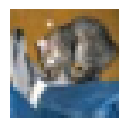

------------------


The Actual Value is Ship
The Predicted Value is  Automobile


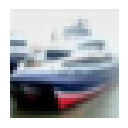

------------------


The Actual Value is Ship
The Predicted Value is  Ship


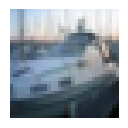

------------------


The Actual Value is Airplane
The Predicted Value is  Airplane


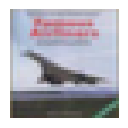

------------------


The Actual Value is Frog
The Predicted Value is  Frog


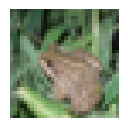

------------------


The Actual Value is Frog
The Predicted Value is  Frog


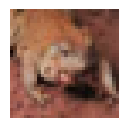

------------------


The Actual Value is Automobile
The Predicted Value is  Automobile


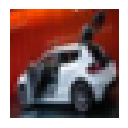

------------------


The Actual Value is Frog
The Predicted Value is  Frog


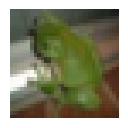

------------------


The Actual Value is Cat
The Predicted Value is  Cat


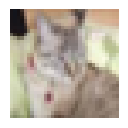

------------------




In [14]:
# checking the correctness of the model
for i in range(9):
    print("The Actual Value is" ,new_y_test_cifar[i])
    print("The Predicted Value is ",new_prediction[i])
    plt.subplot(3,3,i+1)
    show_image(x_test_cifar[i])
    print("------------------")
    print("\n")

[[950  13  29   2   0   0   1   1   4   0]
 [ 23 972   0   0   0   0   0   1   1   3]
 [202   6 673  21  27  36  21  14   0   0]
 [217  19  40 536  32 120  24   6   2   4]
 [180   4  33  18 698  19  13  34   1   0]
 [115  10  26 104  14 712   8  10   0   1]
 [ 87  27  37  20  24  16 784   3   2   0]
 [150   8   6  23  28  37   2 745   0   1]
 [186  71   2   2   0   4   2   0 729   4]
 [115 184   0   0   0   2   0   0   3 696]]


<Axes: >

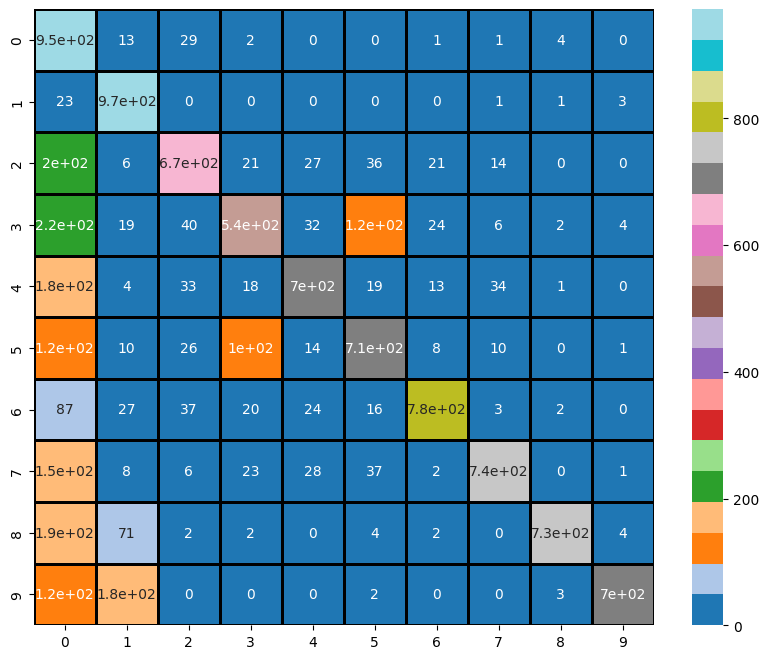

In [28]:
### Confusion Matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


cm = confusion_matrix(y_test_cifar, prediction)
print(cm)

plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True, cmap= 'tab20',linewidths=1, linecolor= 'black')

In [16]:
# performance evaluation
test_evaluation = modelt.evaluate(x_test_cifar,onehotencode_y_test_cifar, verbose=0)

In [26]:
print('The Test loss is : {:.5f}'.format(test_evaluation[0]))
print('The Test accuracy is : {:.5f}'.format(test_evaluation[1]))
print("F1 Score is : {:.5f}".format(f1_score(y_test_cifar, prediction, average='weighted')))
print("Precision Score is : {:.5f}".format(precision_score(y_test_cifar, prediction, average='weighted')))
print("Recall Score is : {:.5f}".format(recall_score(y_test_cifar, prediction, average='weighted')))


The Test loss is : 0.71717
The Test accuracy is : 0.77550
F1 Score is : 0.75952
Precision Score is : 0.80976
Recall Score is : 0.74950


**Hyperparameters**

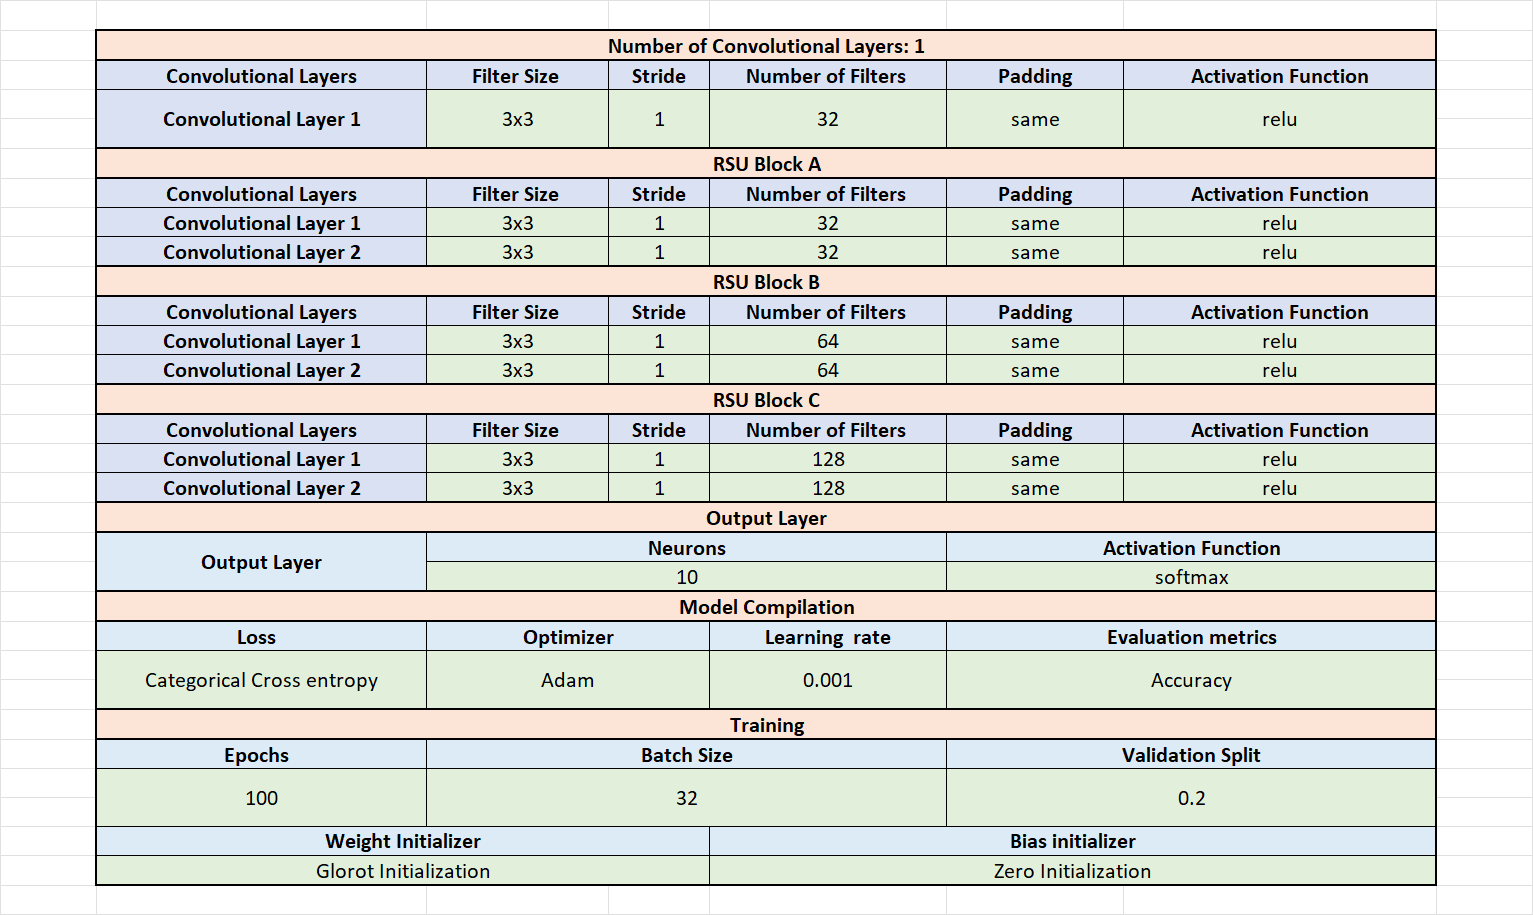